# 2.4 Exercises

This notebook file is intended to be a solution set of the exercises with translation of the R code included in Chapter 2.


## Installation
There are multiple ways to get a notebook environment working. The easiest is probably to install Anaconda and work off of that premade setup.

However, I personally recommend using ASDF to install versions of Python and using Poetry to manage package dependencies. This is because I tend to use separate environments for each project I'm working on (including this one) and I previously had problems with `conda` installs.

Please look at the README.md in the base of the repository to see how to install things.


## Import necessary libraries
Python is handy but doesn't appear to have the same functionality as built into R. To better address matrix math and statistical calculations, I will be using numpy, pandas, and scipy (specifically the stats module from scipy)

In [1]:
import pandas as pd

### Problem Number 8
Uses `College` dataset in `College.csv`

From the problem statement, the variables are defined as: 

• Private : Public/private indicator

• Apps : Number of applications received

• Accept : Number of applicants accepted

• Enroll : Number of new students enrolled

• Top10perc : New students from top 10 % of high school class

• Top25perc : New students from top 25 % of high school class

• F.Undergrad : Number of full-time undergraduates

• P.Undergrad : Number of part-time undergraduates

• Outstate : Out-of-state tuition

• Room.Board : Room and board costs

• Books : Estimated book costs

• Personal : Estimated personal spending

• PhD : Percent of faculty with Ph.D.’s

• Terminal : Percent of faculty with terminal degree

• S.F.Ratio : Student/faculty ratio

• perc.alumni : Percent of alumni who donate

• Expend : Instructional expenditure per student

• Grad.Rate : Graduation rate

(a) Use the read.csv() function to read the data into R. Call the
loaded data college. Make sure that you have the directory set
to the correct location for the data.

(b) Look at the data using the View() function. You should notice
that the first column is just the name of each university. We don’t
really want R to treat this as data. However, it may be handy to
have these names for later. Try the following commands:
```> rownames (college) <- college[, 1]```
```> View (college)```

You should see that there is now a row.names column with the
name of each university recorded. This means that R has given
each row a name corresponding to the appropriate university. R
will not try to perform calculations on the row names. However,
we still need to eliminate the first column in the data where the
names are stored. Try
```> college <- college[, -1]```
```> View (college)```

Now you should see that the first data column is Private. Note
that another column labeled row.names now appears before the
Private column. However, this is not a data column but rather
the name that R is giving to each row.

(c) i. Use the summary() function to produce a numerical summary
of the variables in the data set.

ii. Use the pairs() function to produce a scatterplot matrix of
the first ten columns or variables of the data. Recall that
you can reference the first ten columns of a matrix A using
A[,1:10].

iii. Use the plot() function to produce side-by-side boxplots of
Outstate versus Private.

iv. Create a new qualitative variable, called Elite, by binning
the Top10perc variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10 % of their high school
classes exceeds 50 %.
```> Elite <- rep ("No", nrow (college))```
```> Elite[college$Top10perc > 50] <- " Yes "```
```> Elite <- as. factor (Elite)```
```> college <- data . frame (college , Elite)```

Use the summary() function to see how many elite universities there are. Now use the plot() function to produce
side-by-side boxplots of Outstate versus Elite.

v. Use the hist() function to produce some histograms with
differing numbers of bins for a few of the quantitative variables. You may find the command par(mfrow = c(2, 2))
useful: it will divide the print window into four regions so
that four plots can be made simultaneously. Modifying the
arguments to this function will divide the screen in other
ways.

vi. Continue exploring the data, and provide a brief summary
of what you discover.

In [5]:
""" (a) Use the read.csv() function to read the data into R. Call the
loaded data college. Make sure that you have the directory set
to the correct location for the data.

(b) Look at the data using the View() function. You should notice
that the first column is just the name of each university. We don’t
really want R to treat this as data. However, it may be handy to
have these names for later. Try the following commands:
```> rownames (college) <- college[, 1]```
```> View (college)```
"""
college_datapath  = '../data/College.csv'

#a#
college_dataframe = pd.read_csv(college_datapath)

#b#
college_dataframe.head(10)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [6]:
college_dataframe.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [7]:
# The college names are stored in Pandas as a column named "Unnamed: 0"
college_names_dataframe = college_dataframe['Unnamed: 0']
college_dataframe = college_dataframe.drop(['Unnamed: 0'], axis=1)
print(college_names_dataframe.head())
print(college_dataframe.head())

0    Abilene Christian University
1              Adelphi University
2                  Adrian College
3             Agnes Scott College
4       Alaska Pacific University
Name: Unnamed: 0, dtype: object
  Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869   

(c) i. Use the describe() function to produce a numerical summary
of the variables in the data set.

In [8]:
college_dataframe.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


(c) ii. Use the pairs() function to produce a scatterplot matrix of
the first ten columns or variables of the data. Recall that
you can reference the first ten columns of a matrix A using
A[,1:10].

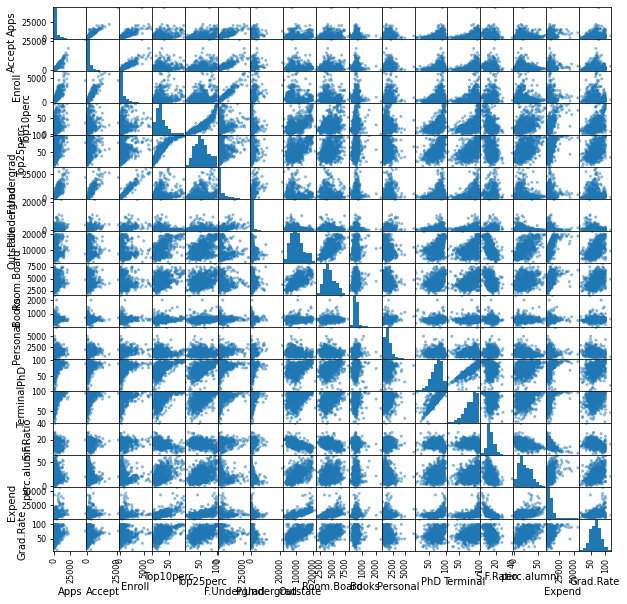

In [13]:
pd.plotting.scatter_matrix(college_dataframe, figsize=(10,10));

(c) iii. Use the plot() function to produce side-by-side boxplots of
Outstate versus Private.

<AxesSubplot:title={'center':'Outstate'}, xlabel='[Private]'>

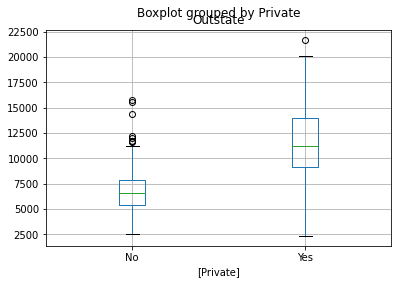

In [14]:
college_dataframe.boxplot(column=["Outstate"], by=['Private']);

(c) 
iv. Create a new qualitative variable, called Elite, by binning
the Top10perc variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10 % of their high school
classes exceeds 50 %.

```> Elite <- rep ("No", nrow (college))```

```> Elite[college$Top10perc > 50] <- " Yes "```

```> Elite <- as. factor (Elite)```

```> college <- data . frame (college , Elite)```

Use the summary() function to see how many elite universities there are. Now use the plot() function to produce
side-by-side boxplots of Outstate versus Elite.

In [15]:
college_dataframe['Elite'] = college_dataframe['Top10perc'] > 50
college_dataframe['Elite']

0      False
1      False
2      False
3       True
4      False
       ...  
772    False
773    False
774    False
775     True
776    False
Name: Elite, Length: 777, dtype: bool

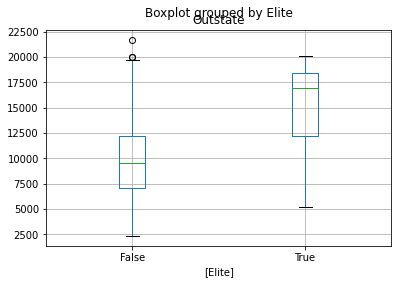

In [16]:
college_dataframe.boxplot(column=["Outstate"], by=['Elite']);

(c) v. Use the `hist()` function to produce some histograms with
differing numbers of bins for a few of the quantitative variables. 

The original question stated: 

You may find the command par(mfrow = c(2, 2))
useful: it will divide the print window into four regions so
that four plots can be made simultaneously. Modifying the
arguments to this function will divide the screen in other
ways.

However, pandas histogram plotting already dynamically and automatically assigns the number of bins for each variable, and plots all of the histograms simultaneously.


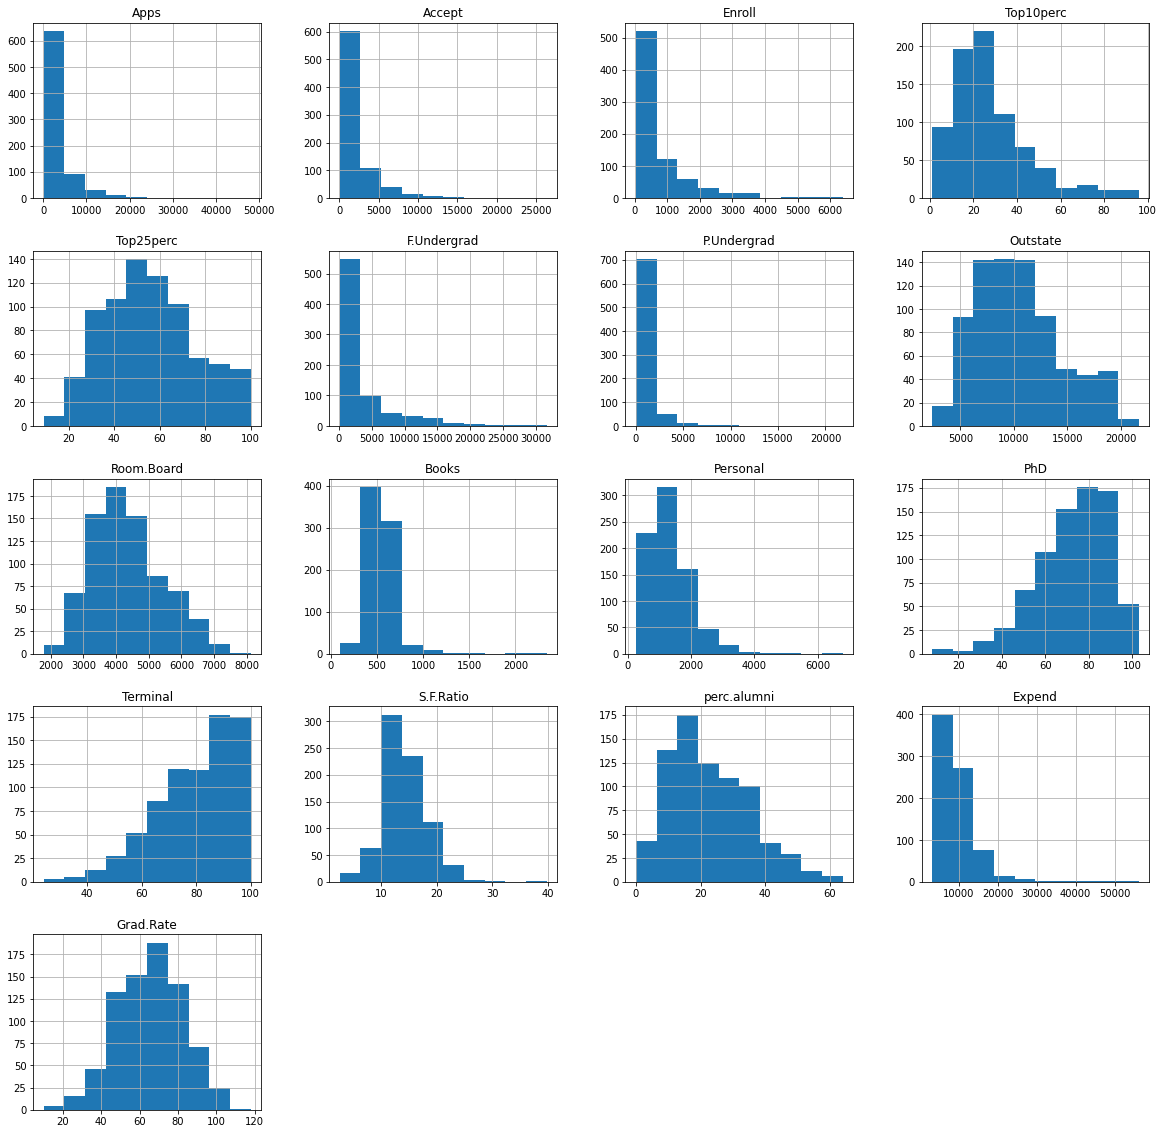

In [18]:
college_dataframe.hist(figsize=(20,20));

(c) vi. Continue exploring the data, and provide a brief summary
of what you discover.

---

## Problem Number 9
Uses `Auto` dataset from lab, make sure that the missing values have been removed from the data

(a) Which of the predictors are quantitative, and which are qualitative?

(b) What is the range of each quantitative predictor? You can answer this using the range() function. 

(c) What is the mean and standard deviation of each quantitative
predictor?

(d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

(e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

(f) Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.

## Problem Number 10
Uses `Boston` housing dataset